In [1]:
import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from matplotlib import  pyplot
from statsmodels.tsa.stattools import acf
import api
from dmi.fetching import objects

country = objects.Countries.DENMARK.value
area = country.areas[1]
start_date = datetime.datetime.strptime('1/1-2019', '%d/%m-%Y')
end_date = datetime.datetime.strptime('1/2-2019', '%d/%m-%Y')
data_batch = api.get_data_batch(
    area, objects.DataTypes.TEMPERATURE, objects.Intervals.HOURLY, start_date)

data = data_batch.dmi_series_list[0].series.values

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(0, 0)   Log Likelihood                 -30.204
Method:                           css   S.D. of innovations              0.852
Date:                Thu, 09 Jan 2020   AIC                             64.407
Time:                        12:43:39   BIC                             66.763
Sample:                             0   HQIC                            65.032
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4989      0.174     37.380      0.000       6.158       6.840
Standard Deviation 0.7254830881175467


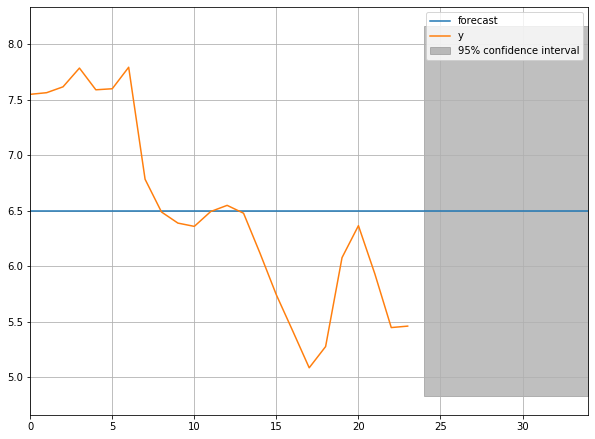

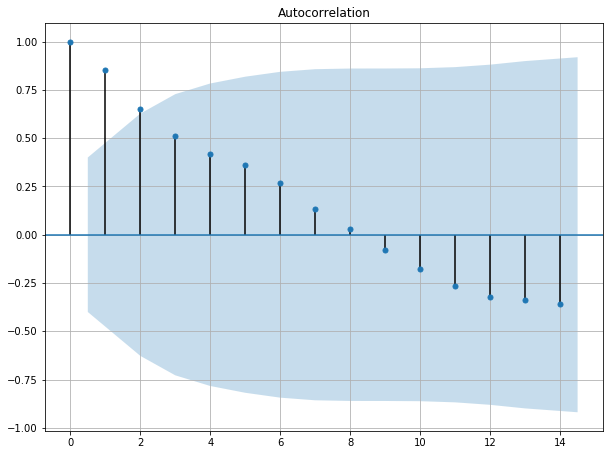

In [2]:
model = ARIMA(data, (0,0,0))
model_fit: ARIMAResults = model.fit(disp=0)
fig: pyplot.Figure = model_fit.plot_predict(end=len(data)+10)
fig.set_size_inches(10,7.5)
pyplot.grid()

fig: pyplot.Figure =plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

print(model_fit.summary())
print('Standard Deviation',model_fit.sigma2)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   23
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  -8.130
Method:                           css   S.D. of innovations              0.345
Date:                Thu, 09 Jan 2020   AIC                             20.260
Time:                        12:43:40   BIC                             22.531
Sample:                             1   HQIC                            20.831
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0908      0.072     -1.264      0.220      -0.232       0.050
Standard Deviation 0.11872565985859689


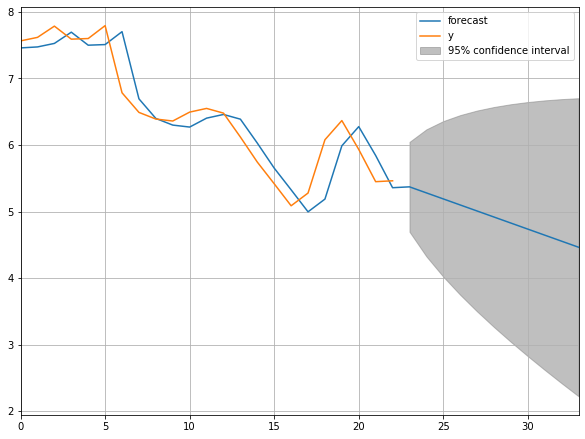

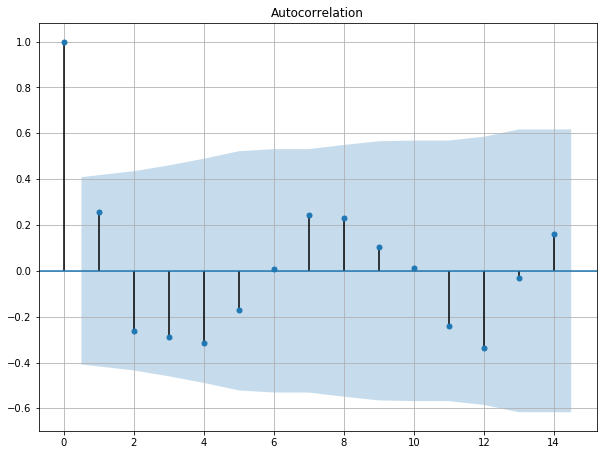

In [3]:
model = ARIMA(data, (0,1,0))
model_fit: ARIMAResults = model.fit(disp=0)
fig: pyplot.Figure = model_fit.plot_predict(end=len(data)+10)
fig.set_size_inches(10,7.5)
pyplot.grid()

fig: pyplot.Figure =plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

print(model_fit.summary())
print('Standard Deviation',model_fit.sigma2)

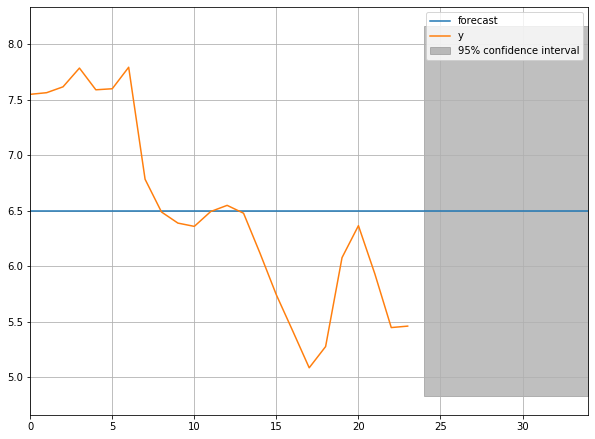

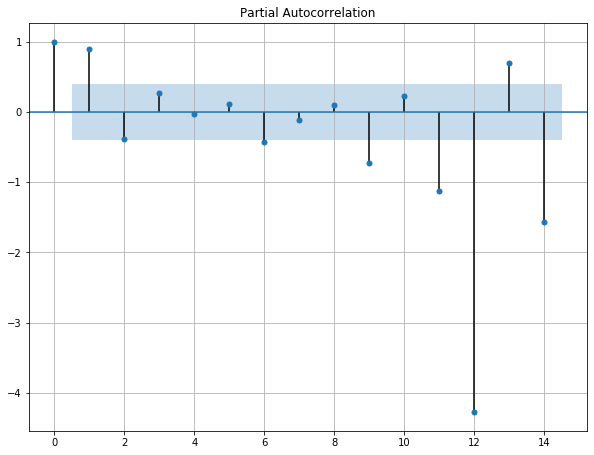

In [4]:
model = ARIMA(data, (0,0,0))
model_fit: ARIMAResults = model.fit(disp=0)
fig: pyplot.Figure = model_fit.plot_predict(end=len(data)+10)
fig.set_size_inches(10,7.5)
pyplot.grid()
fig: pyplot.Figure = plot_pacf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

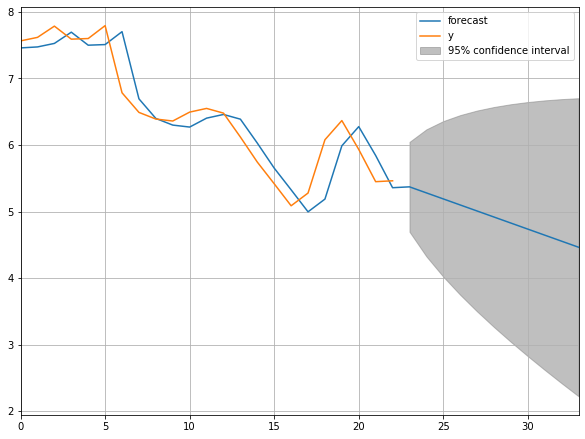

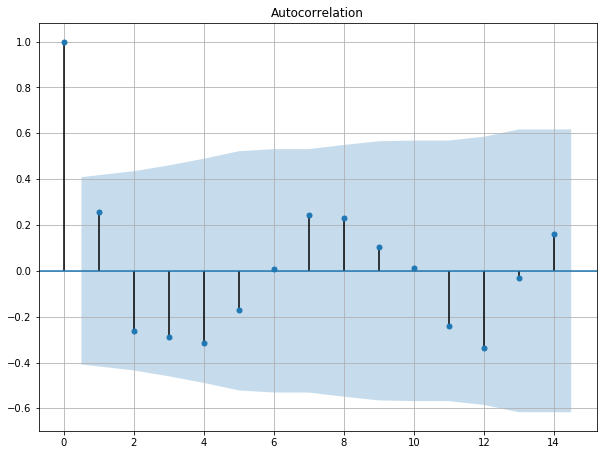

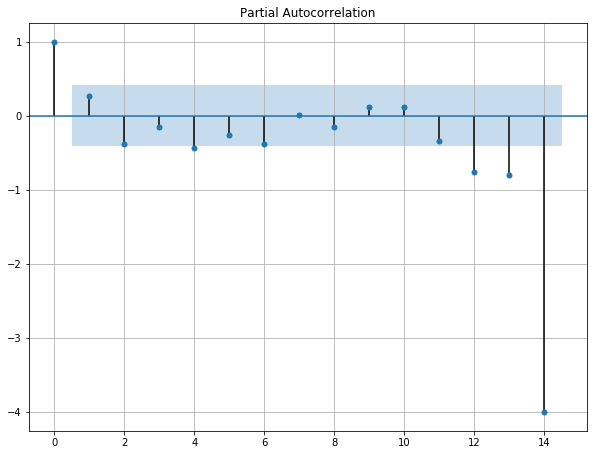

In [5]:
model = ARIMA(data, (0,1,0))
model_fit: ARIMAResults = model.fit(disp=0)
fig: pyplot.Figure = model_fit.plot_predict(end=len(data)+10)
fig.set_size_inches(10,7.5)
pyplot.grid()
fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

fig: pyplot.Figure =plot_pacf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

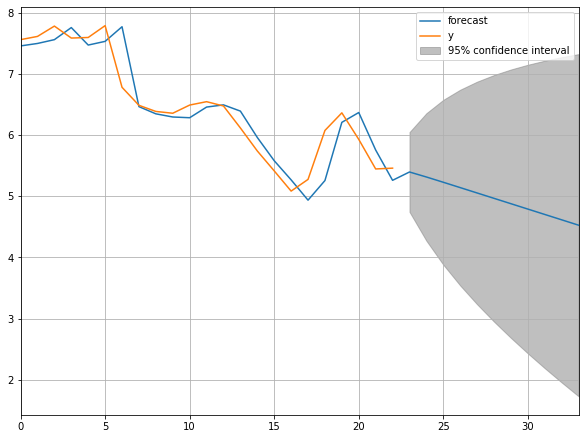

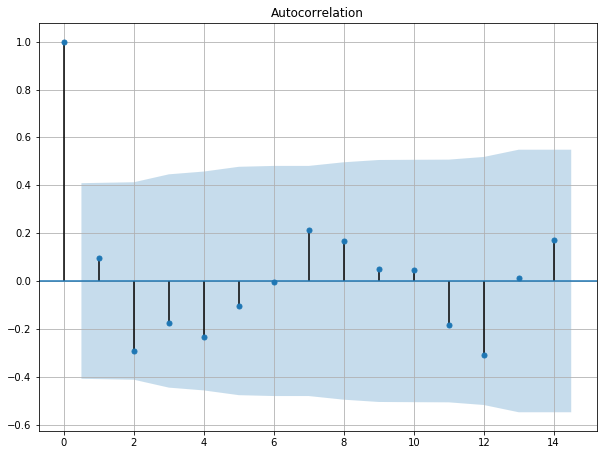

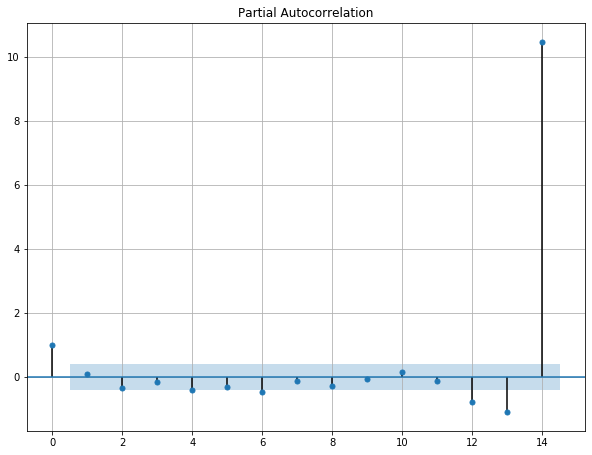

In [6]:
model = ARIMA(data, (1,1,0))
model_fit: ARIMAResults = model.fit(disp=0)
fig: pyplot.Figure = model_fit.plot_predict(end=len(data)+10)
fig.set_size_inches(10,7.5)
pyplot.grid()
fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

fig: pyplot.Figure =plot_pacf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

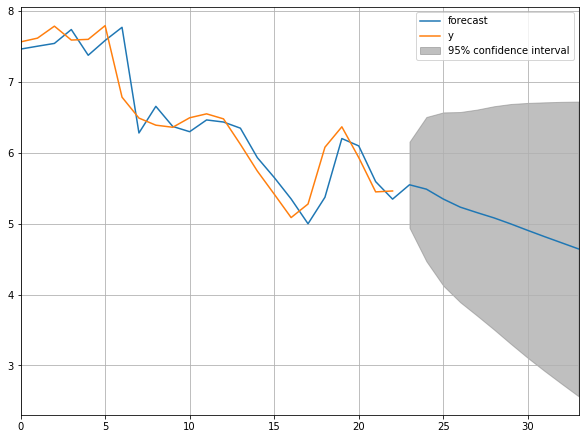

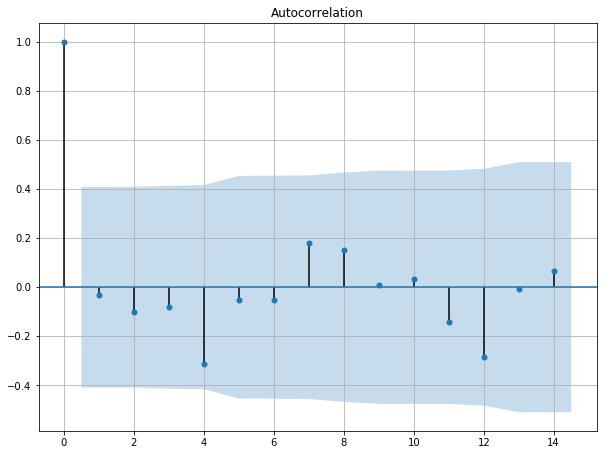

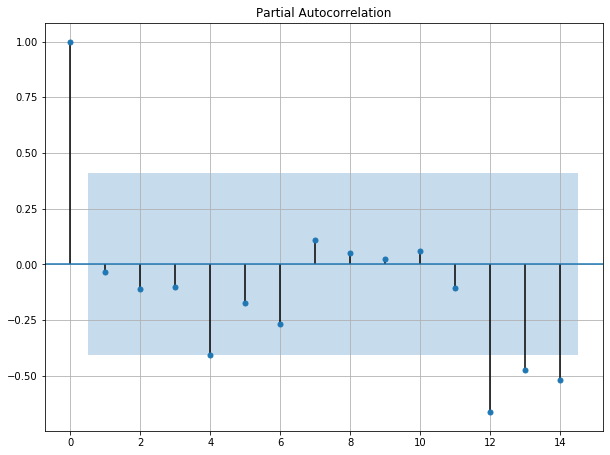

In [7]:
model = ARIMA(data, (2,1,0))
model_fit: ARIMAResults = model.fit(disp=0)
fig: pyplot.Figure = model_fit.plot_predict(end=len(data)+10)
fig.set_size_inches(10,7.5)
pyplot.grid()
fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

fig: pyplot.Figure =plot_pacf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

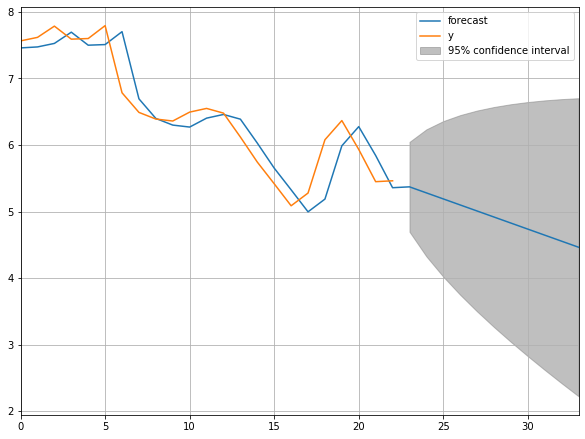

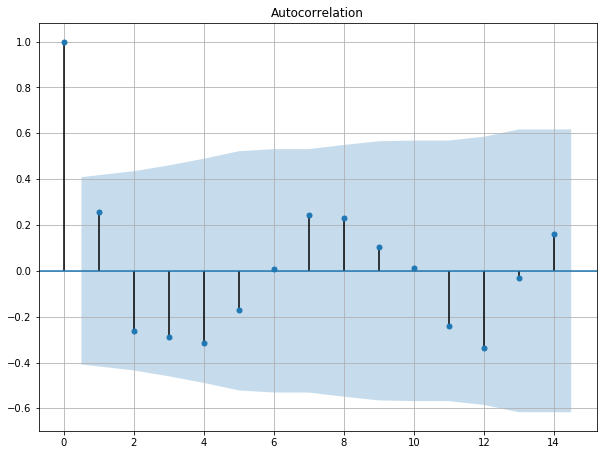

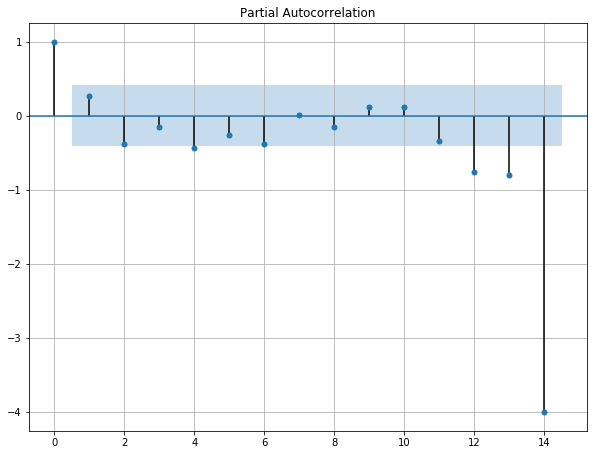

In [8]:
model = ARIMA(data, (0,1,0))
model_fit: ARIMAResults = model.fit(disp=0)
fig: pyplot.Figure = model_fit.plot_predict(end=len(data)+10)
fig.set_size_inches(10,7.5)
pyplot.grid()
fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

fig: pyplot.Figure =plot_pacf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

In [9]:
acf_res, confint = acf(model_fit.resid, nlags=14, alpha=.05)
print(acf_res)
print(confint)
# Den rammer inde for confidence zonen så man kan være ret sikker på at den er god nok

[ 1.          0.2566385  -0.26068218 -0.28682789 -0.3151975  -0.1695109
  0.00828992  0.24309409  0.23105736  0.10343723  0.0102114  -0.23883756
 -0.33823465 -0.03334926  0.15967503]
[[ 1.          1.        ]
 [-0.15204224  0.66531924]
 [-0.69544755  0.17408319]
 [-0.74695904  0.17330326]
 [-0.80428054  0.17388553]
 [-0.69141981  0.352398  ]
 [-0.52273473  0.53931458]
 [-0.28795218  0.77414036]
 [-0.31826053  0.78037524]
 [-0.46188011  0.66875457]
 [-0.55825819  0.57868099]
 [-0.80733779  0.32966266]
 [-0.92325369  0.24678438]
 [-0.65016555  0.58346703]
 [-0.45744233  0.7767924 ]]


c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


2018-12-31 23:00:00    2.888253
2019-01-01 00:00:00    2.888253
2019-01-01 01:00:00    2.888253
2019-01-01 02:00:00    2.888253
2019-01-01 03:00:00    2.888253
                         ...   
2019-01-13 07:00:00    2.888253
2019-01-13 08:00:00    2.888253
2019-01-13 09:00:00    2.888253
2019-01-13 10:00:00    2.888253
2019-01-13 11:00:00    2.888253
Freq: H, Length: 301, dtype: float64
(array([2.88825282, 2.88825282, 2.88825282, 2.88825282, 2.88825282,
       2.88825282, 2.88825282, 2.88825282, 2.88825282, 2.88825282]), array([2.44447942, 2.44447942, 2.44447942, 2.44447942, 2.44447942,
       2.44447942, 2.44447942, 2.44447942, 2.44447942, 2.44447942]), array([[-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7.67934445],
       [-1.9028388 ,  7

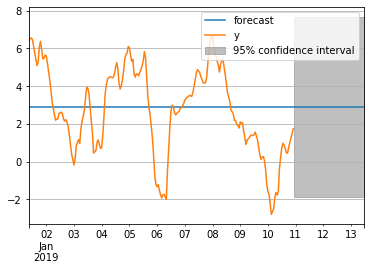

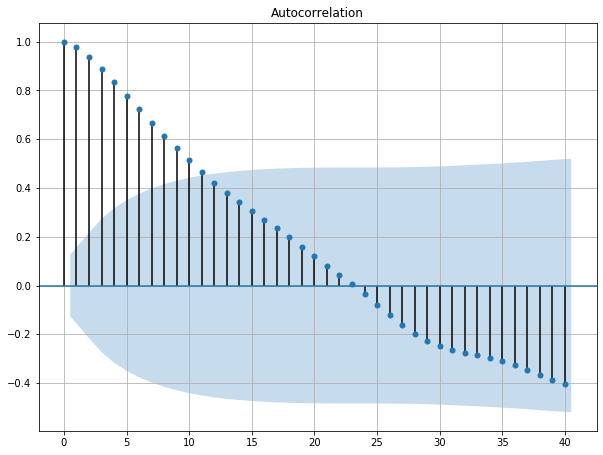

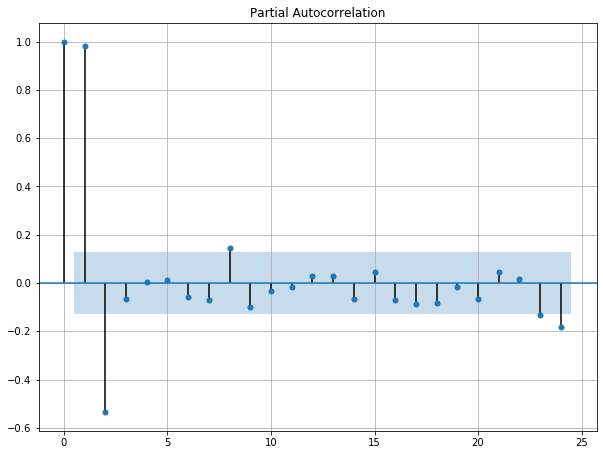

In [30]:
import pandas
start_date = datetime.datetime.strptime('1/1-2019', '%d/%m-%Y')
end_date = datetime.datetime.strptime('10/1-2019', '%d/%m-%Y')
data_batch = api.get_data_timespan(area, objects.DataTypes.TEMPERATURE, objects.Intervals.HOURLY, start_date,
                                       end_date)
data = data_batch.dmi_series_list[0].series
model = ARIMA(data, (0,0,0))
model_fit: ARIMAResults = model.fit(disp=0)
print(model_fit.predict(end=300))
print(model_fit.forecast(10))
pfig: pyplot.Figure = model_fit.plot_predict(start=10,end=300)
fig.set_size_inches(10,7.5)
pyplot.grid()
fig: pyplot.Figure = plot_acf(model_fit.resid,lags=40)
fig.set_size_inches(10,7.5)
pyplot.grid()

fig: pyplot.Figure =plot_pacf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()